In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\Rohit\Downloads\products1.csv")
df

,sale_id,sale_date,quantity_sold,sale_amount,region,customer_id,customer_name,gender,age,city,product_id,product_name,category,price
0,7,2024-09-09,3,750.0,West,231,Robert Harris,M,23,South Christopher,101,Laptop,Electronics,250.0
1,9,2024-11-26,4,1000.0,South,232,James Taylor,F,30,Coreymouth,101,Laptop,Electronics,250.0
2,11,2024-07-21,1,250.0,North,229,Kyle Fisher,M,45,Hernandezville,101,Laptop,Electronics,250.0
3,32,2024-06-06,7,1750.0,North,205,Eric Ruiz,M,61,North Mark,101,Laptop,Electronics,250.0
4,42,2024-12-02,1,250.0,East,295,Brittany Burch,M,54,Port Andretown,101,Laptop,Electronics,250.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,99,2024-07-11,5,250.0,North,282,Matthew Jones,M,36,Thomashaven,116,Gym Bag,Sports,50.0
289,101,2024-01-27,2,100.0,North,234,Sherry Lee,M,54,Danielshire,116,Gym Bag,Sports,50.0
290,208,2024-11-24,4,200.0,West,212,Miss Sara White,F,40,Lake Nicholasshire,116,Gym Bag,Sports,50.0
291,220,2024-06-13,7,350.0,West,212,Miss Sara White,F,40,Lake Nicholasshire,116,Gym Bag,Sports,50.0


In [3]:
df.head()

,sale_id,sale_date,quantity_sold,sale_amount,region,customer_id,customer_name,gender,age,city,product_id,product_name,category,price
0,7,2024-09-09,3,750.0,West,231,Robert Harris,M,23,South Christopher,101,Laptop,Electronics,250.0
1,9,2024-11-26,4,1000.0,South,232,James Taylor,F,30,Coreymouth,101,Laptop,Electronics,250.0
2,11,2024-07-21,1,250.0,North,229,Kyle Fisher,M,45,Hernandezville,101,Laptop,Electronics,250.0
3,32,2024-06-06,7,1750.0,North,205,Eric Ruiz,M,61,North Mark,101,Laptop,Electronics,250.0
4,42,2024-12-02,1,250.0,East,295,Brittany Burch,M,54,Port Andretown,101,Laptop,Electronics,250.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293 entries, 0 to 292
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sale_id        293 non-null    int64  
 1   sale_date      293 non-null    object 
 2   quantity_sold  293 non-null    int64  
 3   sale_amount    293 non-null    float64
 4   region         293 non-null    object 
 5   customer_id    293 non-null    int64  
 6   customer_name  293 non-null    object 
 7   gender         293 non-null    object 
 8   age            293 non-null    int64  
 9   city           293 non-null    object 
 10  product_id     293 non-null    int64  
 11  product_name   293 non-null    object 
 12  category       293 non-null    object 
 13  price          293 non-null    float64
dtypes: float64(2), int64(5), object(7)
memory usage: 32.2+ KB


In [5]:

# Step 3: Check for null values

df.isnull().sum()

sale_id          0
sale_date        0
quantity_sold    0
sale_amount      0
region           0
customer_id      0
customer_name    0
gender           0
age              0
city             0
product_id       0
product_name     0
category         0
price            0
dtype: int64

In [6]:
# Step 4: Drop rows with missing values (or you can fill them if needed)
df = df.dropna()


In [7]:
# Step 5: Convert data types (if needed)
df['quantity_sold'] = pd.to_numeric(df['quantity_sold'], errors='coerce')
df['price'] = pd.to_numeric(df['price'], errors='coerce')

In [8]:
df['total_sale_amount'] = df['quantity_sold'] * df['price']

In [9]:
df.to_excel("cleaned_sales_data.xlsx", index=False)

C:\Users\Rohit\AppData\Local\Temp\ipykernel_8824\4135850104.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.index, y=category_sales.values, palette="viridis")


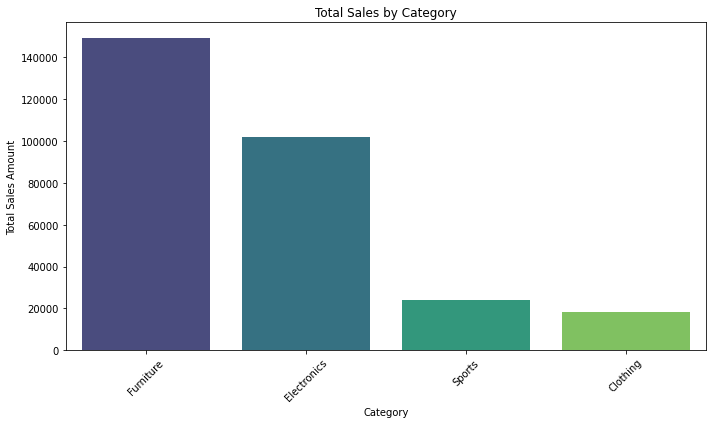

In [10]:
# 1️⃣ Bar Chart – Total Sales by Category
plt.figure(figsize=(10,6))
category_sales = df.groupby('category')['total_sale_amount'].sum().sort_values(ascending=False)
sns.barplot(x=category_sales.index, y=category_sales.values, palette="viridis")
plt.title("Total Sales by Category")
plt.ylabel("Total Sales Amount")
plt.xlabel("Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

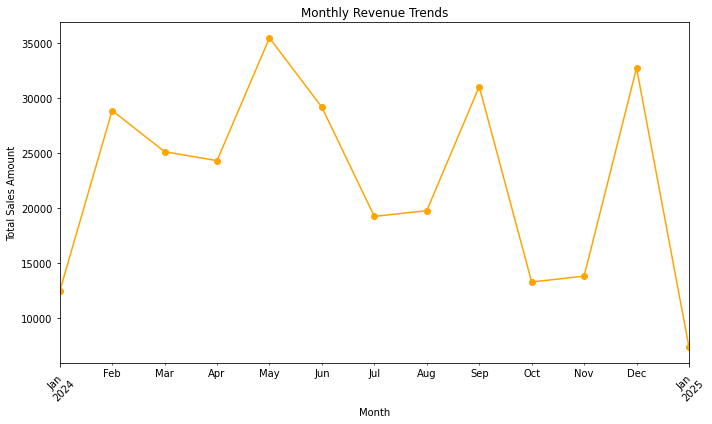

In [11]:
# 2️⃣ Line Chart – Revenue Trends by Month
df['sale_date'] = pd.to_datetime(df['sale_date'])
df['Month'] = df['sale_date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['total_sale_amount'].sum()
plt.figure(figsize=(10,6))
monthly_sales.plot(kind='line', marker='o', color='orange')
plt.title("Monthly Revenue Trends")
plt.ylabel("Total Sales Amount")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

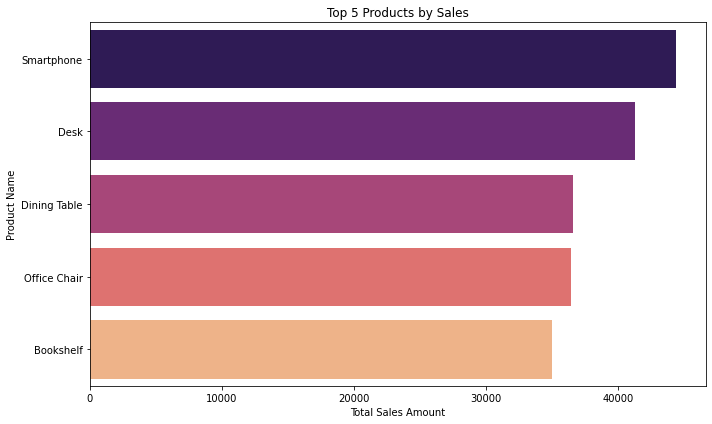

In [14]:
# 3️⃣ Top 5 Products by Sales – Table as Bar Chart
top_products = df.groupby('product_name')['total_sale_amount'].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(10,6))
sns.barplot(x=top_products.values, y=top_products.index, palette="magma")
plt.title("Top 5 Products by Sales")
plt.xlabel("Total Sales Amount")
plt.ylabel("Product Name")
plt.tight_layout()
plt.show()